In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

# Are Luxury Cars Less Likely To Get Into Accidents?

It goes without saying that the rich love their luxurious cars. Does this mean that they will go through extra lengths to take care of them from accidents? To answer this question we will be using two datasets.

<img src="https://s1.cdn.autoevolution.com/images/news/mercedes-benz-wants-australia-to-drop-its-luxury-car-tax-103952_1.jpg" width=50% class="inline"/>
## The Data

### Motor Vehicle Crashes in New York State
Shows all the motor vehicle crashes within the New York State from 2012 to 2014. Includes information such as the vehicle's make, contributing factors to the incident, and actions prior to the incident.

The data can be found [here](https://catalog.data.gov/dataset/motor-vehicle-crashes-vehicle-information-beginning-2009/resource/6b83cc59-6e65-443c-8b97-9300891c1333).

In [2]:
crashes_df = pd.read_csv('../Data/Motor_Vehicle_Crashes_-_Vehicle_Information__Three_Year_Window.csv')
crashes_df.head()

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2013,11256149,2 DOOR SEDAN,Not Entered,Backing,Not Entered,South,Not Entered,2013.0,NY,1.0,NaN,HOND,HUMAN,Backing Unsafely,HUMAN,Driver Inattention/Distraction*,Not Applicable,NaN
1,2013,11330798,4 DOOR SEDAN,Not Entered,Overtaking/Passing,Not Entered,North,Not Entered,2013.0,VA,1.0,NaN,DODG,HUMAN,Unsafe Lane Changing,HUMAN,Passing or Lane Usage Improper,"Overturned, Non-Collision",NaN
2,2013,11053659,2 DOOR SEDAN,Not Entered,Going Straight Ahead,Not Entered,East,Not Entered,2010.0,PA,1.0,NaN,NISS,ENVMT,Animal's Action,HUMAN,Not Applicable,Not Applicable,NaN
3,2013,10831549,POLICE VEHICLE,Not Entered,Going Straight Ahead,Not Entered,East,Not Entered,2012.0,NY,1.0,NaN,FORD,ENVMT,Animal's Action,HUMAN,Not Applicable,Not Applicable,NaN
4,2013,10890741,SUBURBAN,Not Entered,Changing Lanes,Not Entered,North,Not Entered,2006.0,NJ,3.0,NaN,DODG,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN


### U.S. 2013-2014 New Vehicle Sales Volume
This dataset contains the sales volume of different car brands and models for the years 2013 and 2014. 

Data was downloaded from [here](http://www.goodcarbadcar.net/p/downloads.html)

In [3]:
sales_df = pd.read_csv('car_sales.csv')
sales_df.head()

,U.S. 2014 Calendar Year New Vehicle Sales Volume All Vehicles & All Automakers – Two Sheets © GoodCarBadCar.net,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Vehicle/Brand/Manufacturer,2014,2013,% Change
3,Total New Vehicle Sales ¥,"16,516,116","15,595,820",5.9%
4,Passenger Cars Ø,"7,935,161","7,801,870",1.7%


## Motor Vehicle Crashes Dataset

We'll start cleaning this dataset up first then do some exploration.

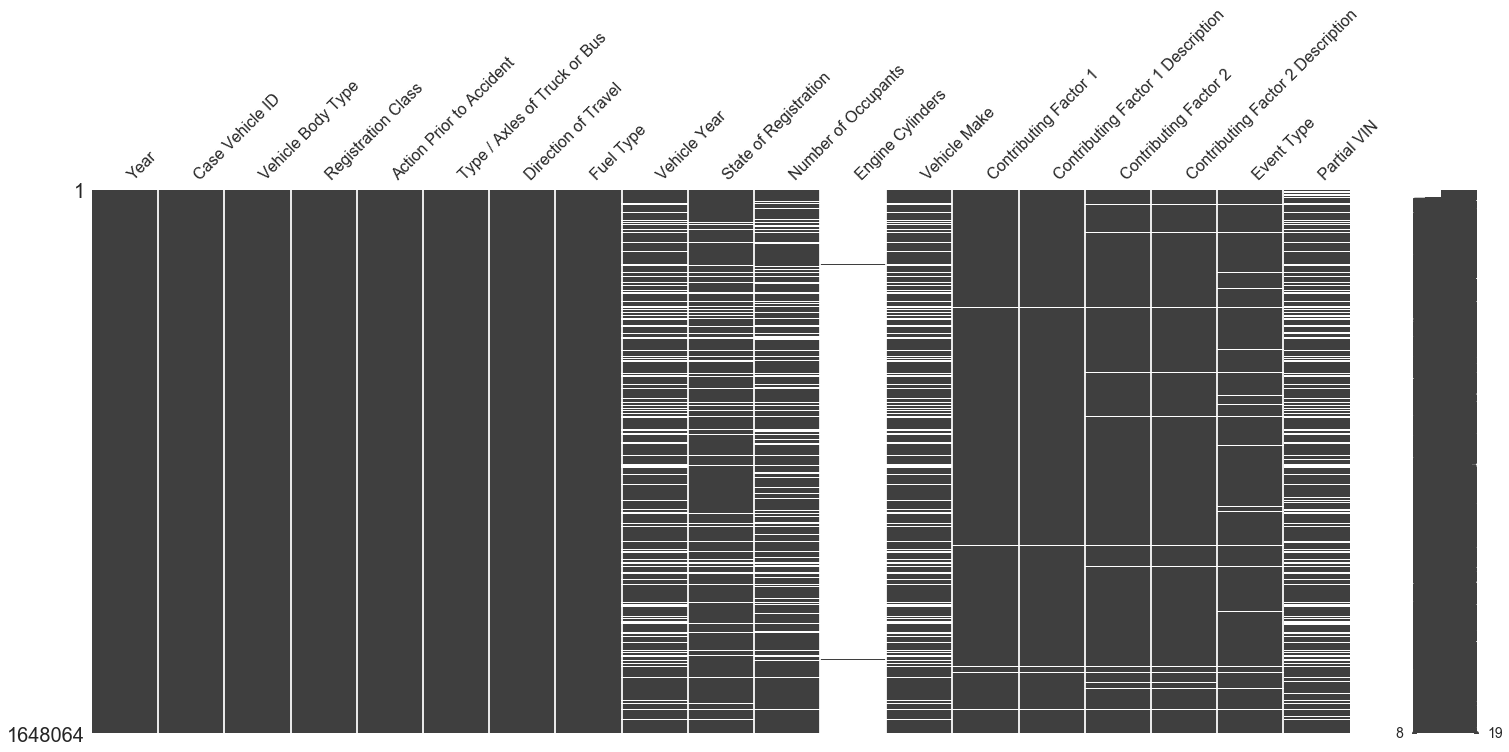

In [5]:
msno.matrix(crashes_df)



In order to measure the number of luxury vehicles, we would need to know the car's make.


In [6]:
print('Tail of the Vehicle Make column: ' + str(crashes_df['Vehicle Make'].unique()[-30:]))
print('\n\nNumber of unique brand names: ' + str(len(crashes_df['Vehicle Make'].unique())))

Tail of the Vehicle Make column: ['ALFA' 'THMOA' 'CHVRL' 'VURM' 'SUPRM' 'TESL' 'TOYOA' 'KING' 'HYSTE'
 'HURST' 'BUSO' 'MNRC' 'MACKQ' 'SPPR' 'KNTY' 'ETNYR' 'MAZ' 'FODR' 'LARO'
 'LEXES' 'KALM' 'PACKA' 'BOCS' 'TRUMP' 'PR/ON' 'PONSC' 'SEAR' 'WHI' 'YAMAG'
 'SPCNS']


Number of unique brand names: 2000


From the visible typos, we can assume that this column is close to uncleanable (2000 unique brand names!). Thankfully we can then look at the Vehicular Information Number of the car. Although the VIN provided is only provided in part for privacy purposes, it is enough for us to use for our data.

There are still rows where the 'Partial VIN' is null. Let's see if the rows where VIN is null, it can then be replaced by the original 'Vehicle Make' column.

In [7]:
vin_missing = crashes_df[(crashes_df['Vehicle Make'].notnull()) & crashes_df['Partial VIN'].isnull()]
vin_missing_unique = vin_missing['Vehicle Make'].unique()
len(vin_missing_unique)

610

In [9]:
vin_missing['Vehicle Make'].unique()[:20]

array(['HOND', 'DODG', 'NISS', 'FORD', 'TOYT', 'DODGE', 'CHRY', 'MAC',
       'ME/BE', 'CHEV', 'VOLV', 'HYUN', 'PONT', 'HONDA', 'CADI', 'SUBA',
       'FRHT', 'JEEP', 'SCIO', 'JAGU'], dtype=object)

It seems that even as a backup, the column 'Vehicle Make' has too many mistakes and typos. We will not use it at all. Any rows where there are null values in 'Partial VIN' will now be dropped.

In [11]:
crashes_df = crashes_df.dropna(axis=0,subset=['Partial VIN'])
crashes_df = crashes_df.reset_index()

In [12]:
crashes_df = crashes_df.drop(labels=['index'],axis=1)

In [13]:
crashes_df.head()

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2013,10950427,4 DOOR SEDAN,Not Entered,Parked,Not Entered,South,Not Entered,1998.0,NY,0.0,NaN,MAZD,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,1YVGF22D3W5
1,2013,11245573,TRACTOR,Not Entered,Going Straight Ahead,Not Entered,East,Not Entered,2000.0,NJ,1.0,NaN,FRHT,HUMAN,Unsafe Speed,HUMAN,Not Applicable,Not Applicable,IU201417285
2,2013,11202923,4 DOOR SEDAN,Not Entered,Slowing or Stopping,Not Entered,North,Not Entered,2013.0,IL,2.0,NaN,FORD,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,1FADP3F28DL
3,2013,10944884,DELIVERY TRUCK,Not Entered,Going Straight Ahead,Not Entered,North,Not Entered,1988.0,UN,1.0,NaN,GRUM,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,1GBBS10EXK2
4,2012,11143993,TRACTOR,SEMI-TRAILER,Making Right Turn,Not Entered,South,None,2012.0,NY,1.0,0.0,AM/HA,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,5N6200F20C1


Now that the dataset is cleaned up, we can use 'Partial VIN' to obtain the Vehicle Make and other information. Because the dataset is so large, I decided to write a script outside of this notebook, writing the data to SQLite database. The data was then saved to *'vin_info.csv'* upon completion.

In [15]:
vin_info = pd.read_csv('../vin_info.csv')

In [16]:
vin_info.head()

,Unnamed: 0,car_id,year,make,manufacturer
0,0,0,1998.0,MAZDA,"AUTO ALLIANCE INTERNATIONAL, USA"
1,1,1,NaN,NaN,NaN
2,2,2,2013.0,FORD,"FORD MOTOR COMPANY, USA"
3,3,3,1989.0,CHEVROLET,GENERAL MOTORS LLC
4,4,4,2012.0,AMERICAN HAULER,"AMERICAN HAULER INDUSTRIES, LLC."


## Car Brands DataFrame
Now that we have no more typos, we can make a dataframe revolving around car brands.

In [18]:
car_brands_df = vin_info.groupby(by='make').count()
car_brands_df = car_brands_df.sort_values(by='car_id',ascending=False)
car_brands_df.head()

,Unnamed: 0,car_id,year,manufacturer
make,,,,
TOYOTA,159310,159310,159298,159310
FORD,155295,155295,155286,155295
HONDA,141798,141798,141794,141798
CHEVROLET,141320,141320,141314,141320
NISSAN,105793,105793,105792,105793


In [20]:
car_brands_df = pd.DataFrame(car_brands_df.iloc[:,0])
car_brands_df = car_brands_df.rename(index=str,columns={'Unnamed: 0':'Num of Accidents'})
car_brands_df.head(10)

,Num of Accidents
make,
TOYOTA,159310
FORD,155295
HONDA,141798
CHEVROLET,141320
NISSAN,105793
DODGE,64312
HYUNDAI,55938
JEEP,49458
SUBARU,30908


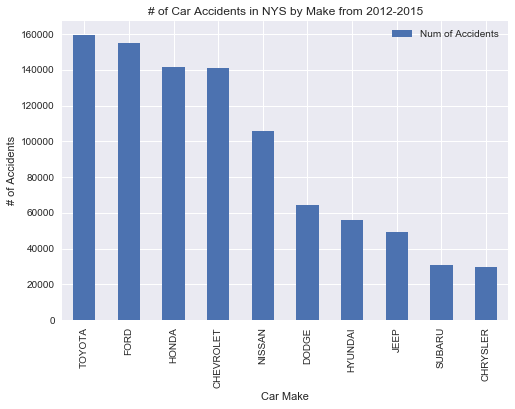

In [22]:
ax = car_brands_df.iloc[:10].plot(kind='bar')
ax.set_title('# of Car Accidents in NYS by Make from 2012-2015')
ax.set_ylabel('# of Accidents')
ax.set_xlabel('Car Make')

We see that Toyota takes the top, having the most accidents out of all the car brands. However, Toyota is one of the most popular car brands and would have a larger volume of cars on the road. To get an idea of how luxury cars are more likely to be in an accident, we need to observe a metric like accidents per 1000 cars.

There is no data on the volume of car brands on the New York City roads nor is there any data on what kind of cars New Yorkers have. 

This is where our second dataset comes in. I decided to use the dataset containing 2013/2014 Car Vehicle Sales (other years were blocked by a paywall). From individual car brand sales, we can obtain an idea of the popularity of each car brand in America. This directly correlates with the number of each car brand on New York roads.

### Sales DataFrame

In [24]:
sales_df.head(20)

,U.S. 2014 Calendar Year New Vehicle Sales Volume All Vehicles & All Automakers – Two Sheets © GoodCarBadCar.net,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Vehicle/Brand/Manufacturer,2014,2013,% Change
3,Total New Vehicle Sales ¥,"16,516,116","15,595,820",5.9%
4,Passenger Cars Ø,"7,935,161","7,801,870",1.7%
5,SUVs & Crossovers Ø,"5,314,878","4,747,988",11.9%
6,Pickup Trucks,"2,320,219","2,175,633",6.6%
7,Minivans,"556,548","532,357",4.5%
8,Commercial Vans,"356,814","312,045",14.3%
9,NaN,NaN,NaN,NaN


In [26]:
long_column_name = 'U.S. 2014 Calendar Year New Vehicle Sales Volume  \nAll Vehicles & All Automakers – Two Sheets \n© GoodCarBadCar.net'
sales_df = sales_df.rename(index=str,columns={long_column_name: 'Make',
                                              'Unnamed: 1': '2014',
                                              'Unnamed: 2': '2013',
                                              'Unnamed: 3': '% Change'})

We don't need individual car models. We do need, as the dataset puts it, the "Brand Total". So we attempt to remove everything else.

In [27]:
# Checks if 'Brand Total' is in a string.
def brand_total(x):
    return ('Brand Total' in str(x)) 

In [28]:
sales_df = sales_df[sales_df['Make'].map(brand_total)]

In [29]:
# Formatting 'Make' column such that it is the same with our crashes dataset, then making it the index.
sales_df['Make'] = sales_df['Make'].map(lambda x: x.replace(" Brand Total","").upper())
sales_df = sales_df.set_index(sales_df['Make']).drop('Make',axis=1)
sales_df.head()

,2014,2013,% Change
Make,,,
BMW,"339,738","309,280",9.8%
MINI,"56,112","66,502",-15.6%
CHRYSLER,"308,785","302,492",2.1%
DODGE,"574,155","596,343",-3.7%
JEEP,"692,348","490,454",41.2%


In [31]:
#Turning the strings to ints
sales_df.iloc[:,0] = sales_df.iloc[:,0].map(lambda x: int(x.replace(",","")))
sales_df.iloc[:,1] = sales_df.iloc[:,1].map(lambda x: int(x.replace(",","")))

We are given 2013 and 2014 sales data. I decided to take the mean of the two to better represent the data.

In [32]:
sales_df['Mean Sales'] = (sales_df.iloc[:,0] + sales_df.iloc[:,1])/2
sales_df.head()

,2014,2013,% Change,Mean Sales
Make,,,,
BMW,339738,309280,9.8%,324509.0
MINI,56112,66502,-15.6%,61307.0
CHRYSLER,308785,302492,2.1%,305638.5
DODGE,574155,596343,-3.7%,585249.0
JEEP,692348,490454,41.2%,591401.0


### Merging Sales dataframe with the Car Brands Dataframe

This is where we put two and two together. By dividing the number of accidents by the mean sales of each car brand, we will get a number that is heavily correlated with accidents per car brand volume. I will name this number 'Accident Score' where the bigger the number is, the higher likelihood of being in a car crash.

In [34]:
car_brands_df['Mean Sales'] = sales_df.ix[car_brands_df.index,'Mean Sales']

In [35]:
car_brands_df

,Num of Accidents,Mean Sales
make,,
TOYOTA,159310,1949123.5
FORD,155295,2390191.5
HONDA,141798,1366452.5
CHEVROLET,141320,1990283.5
NISSAN,105793,1200765.0
DODGE,64312,585249.0
HYUNDAI,55938,723250.5
JEEP,49458,591401.0
SUBARU,30908,469188.0


In [37]:
car_brands_df['Accident Score'] = car_brands_df['Num of Accidents']/car_brands_df['Mean Sales']

In [38]:
car_brands_df = car_brands_df.sort_values(by='Accident Score',ascending=False)
car_brands_df.head(15)

,Num of Accidents,Mean Sales,Accident Score
make,,,
SUZUKI,7631,2973.0,2.566768
LINCOLN,17720,88084.0,0.201172
MITSUBISHI,13400,69935.0,0.191606
VOLVO,9266,58799.5,0.157586
ACURA,19629,166639.5,0.117793
JAGUAR,1811,16362.5,0.110680
DODGE,64312,585249.0,0.109888
INFINITI,12158,116892.5,0.104010
HONDA,141798,1366452.5,0.103771


Suzuki is a heavy outlier because despite the number of accidents being relatively low, its Accident Score is incredibly high. A quick Google search will tell us that Suzuki stopped U.S. car sales in 2012: one of the years this dataset starts. We will remove Suzuki for the sake of consistency in the data.

In [40]:
car_brands_df = car_brands_df.drop('SUZUKI',axis=0)
car_brands_df.head(10)

,Num of Accidents,Mean Sales,Accident Score
make,,,
LINCOLN,17720,88084.0,0.201172
MITSUBISHI,13400,69935.0,0.191606
VOLVO,9266,58799.5,0.157586
ACURA,19629,166639.5,0.117793
JAGUAR,1811,16362.5,0.110680
DODGE,64312,585249.0,0.109888
INFINITI,12158,116892.5,0.104010
HONDA,141798,1366452.5,0.103771
CHRYSLER,29504,305638.5,0.096532


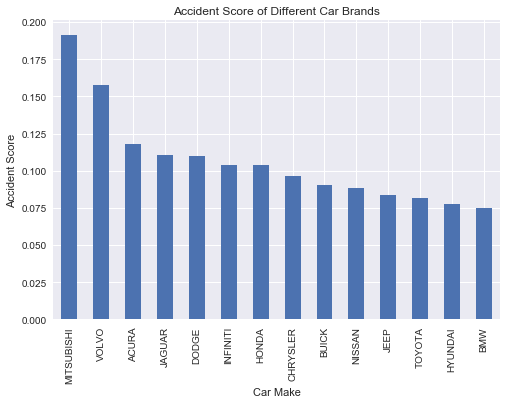

In [42]:
ax = car_brands_df.iloc[1:15,2].plot(kind='bar')
ax.set_title('Accident Score of Different Car Brands')
ax.set_ylabel('Accident Score')
ax.set_xlabel('Car Make')

Right off the bat, luxury car brands within the top ten of our normalized accidents list include: Lincoln, Volvo, Acura, Jaguar, and Infiniti. This does not include the car brands who partly make luxury cars. Seeing that luxury cars dominate literally half of the top ten, we need to take our analysis further.

In [44]:
luxury = ['LINCOLN','VOLVO','ACURA','JAGUAR','INFINITI']
non_lux = ['SUZUKI','MITSUBISHI','DODGE','HONDA','CHRYSLER']
print('luxury car accident score: ' + str(car_brands_df.ix[luxury,2].sum()))
print('non-luxury car accident score: ' + str(car_brands_df.ix[non_lux,2].sum()))

luxury car accident score: 0.6912411863163387
non-luxury car accident score: 0.5017979986382466


# Conclusion
With luxury car brands having a higher Accident Score than non-luxury cars, we can say that luxury car brands face a slightly higher chance of accident in New York State than non-luxury cars. This is the complete opposite of our hypothesis.

The higher Accident Score can be attributed to several causes:

* Speeding is common with luxury cars
* Cheaper cars means lower-income => Cannot afford to crash
* Our Accident Score was not calculated correctly due to limited data